In [1]:
import matplotlib.pyplot as plt
import numpy as np

有两种Artist,primitives和containers.primitives是组件比如Line2D, Rectangle, Text, AxesImage,.Contaniner是放组建的地方 (Axis, Axes and Figure).

标准的使用方法是创建一个Figure的实例,然后使用这个Figure来创造一个或者多个Axes or Subplot实例,然后用Axes实例来创建primitivrs

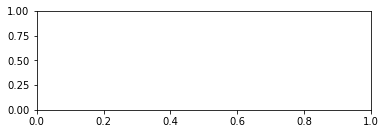

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

Axes是最重要的API,因为Axes是大多数plot的对象会在其上面画的.

如果你想创建一个任意位置的Axes的话可以使用add_axes()工具

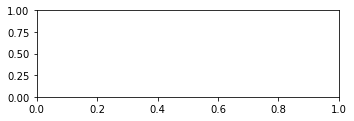

In [3]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

In [4]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

In [6]:
ax.lines[0]
line

In [7]:
#del ax.lines[0]
ax.lines.remove(line)  # one or the other, not both!
#可以通过这个来删除line

In [8]:
#轴还具有辅助方法来配置和装饰x轴和y轴刻度线，刻度线标签和轴标签
xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')
#调用时ax.set_xlabel，它将传递有关Text 实例的信息XAxis。每个Axes 实例均包含XAxis和 YAxis实例，用于处理刻度线，刻度线标签和轴标签的布局和绘制。

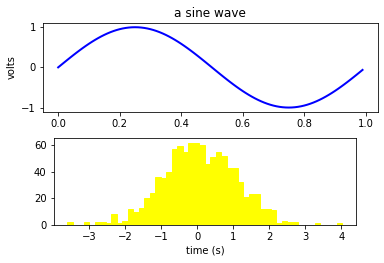

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()

图中的每个元素都由matplotlib表示，每个元素 Artist都有用于配置其外观的大量属性列表。图形本身包含图形 Rectangle的大小，您可以使用它来设置图形的背景颜色和透明度。同样，每个Axes边界框（在典型的matplotlib图中具有黑色边缘的标准白色框，都有一个Rectangle实例来确定轴的颜色，透明度和其他属性。这些实例存储为成员变量Figure.patch，Axes.patch（“ Patch”是名称是从MATLAB继承的，是图形上的颜色的2D“色块”，例如矩形，圆形和多边形。每个matplotlib Artist具有以下属性

In [ ]:
'''
Property	Description
alpha	透明度-0-1的标量
animated	A boolean that is used to facilitate animated drawing
axes	The axes that the Artist lives in, possibly None
clip_box	The bounding box that clips the Artist
clip_on	Whether clipping is enabled
clip_path	The path the artist is clipped to
contains	A picking function to test whether the artist contains the pick point
figure	The figure instance the artist lives in, possibly None
label	A text label (e.g., for auto-labeling)
picker	A python object that controls object picking
transform	The transformation
visible	A boolean whether the artist should be drawn
zorder	A number which determines the drawing order
rasterized	Boolean; Turns vectors into raster graphics (for compression & eps transparency)

每个属性都可以通过老式的setter或getter来访问'''

In [11]:
#如果要一次设置多个属性，则还可以使用set带有关键字参数的方法。例如
#o.set(alpha=0.5, zorder=2)

#检查Artist属性的一种简便方法是使用该 matplotlib.artist.getp()函数
import matplotlib as mpl
mpl.artist.getp(fig)

agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._subplots.AxesSubplot object at ...
    children = [<matplotlib.patches.Rectangle object at 0x0000026...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    contains = None
    default_bbox_extra_artists = [<matplotlib.axes._subplots.AxesSubplot object at ...
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 4.0
    figure = None
    figwidth = 6.0
    frameon = True
    gid = None
    in_layout = True
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [6. 4.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     Bbox(x0=0.0, y0=0.0,

In [ ]:
#现在我们知道了如何检查和设置要配置的给定对象的属性，我们需要知道如何获取该对象。如引言中所述，有两种对象.primitive 和container 在本节中，我们将回顾各种容器对象存储要获取的对象的位置


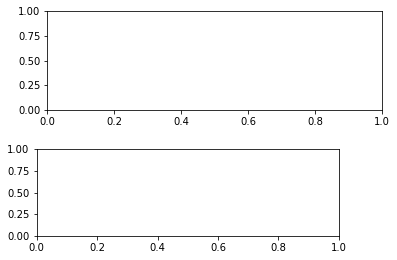

In [12]:
#图容器
#顶层容器Artist是 matplotlib.figure.Figure.它包含图中的所有内容。图的背景是 Rectangle，存储在中 Figure.patch。当您在图中添加子图（add_subplot()）和轴（add_axes()）时，它们将被附加到Figure.axes。这些也由创建它们的方法返回

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1,0.1,0.7,0.3])

由于该图保留了“当前轴”（请参阅Figure.gca和 Figure.sca）的概念 以支持pylab / pyplot状态机，因此您不应直接从轴列表中插入或删除轴，而应使用 add_subplot()和 add_axes()方法插入，以及 delaxes()方法删除。但是，您可以自由地遍历轴列表或对其进行索引以访问Axes要自定义的实例。这是一个打开所有轴网格的示例：

In [14]:
for ax in fig.axes:
    print(ax.grid(True))

None
None


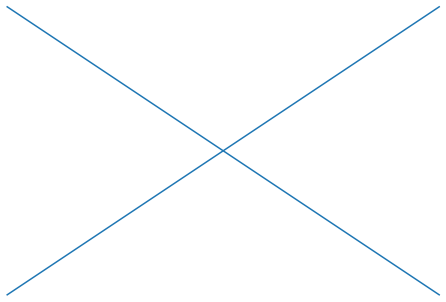

In [15]:
#该图还具有自己的文本，线条，补丁和图像，您可以使用它们直接添加基元。的默认坐标系Figure将只是以像素为单位（通常不是您想要的像素），但是您可以通过设置Artist要添加到图形中的的transform属性来控制它。

#“数字坐标”更有用，其中（0，0）是图形的左下角，而（1，1）是图形的右上角，您可以通过将Artist变换设置为来获得fig.transFigure：
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig)
l2 = lines.Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1, l2])

plt.show()

In [ ]:
'''
下面是figure包含的artists:
Figure attribute	Description
axes	A list of Axes instances (includes Subplot)
patch	The Rectangle background
images	A list of FigureImages patches - useful for raw pixel display
legends	A list of Figure Legend instances (different from Axes.legends)
lines	A list of Figure Line2D instances (rarely used, see Axes.lines)
patches	A list of Figure patches (rarely used, see Axes.patches)
texts	A list Figure Text instances

轴容器

matplotlib.axes.Axes是matplotlib宇宙的中心-它包含Artists图中使用的所有绝大多数，以及许多用于创建并将其添加 Artists到自身的辅助方法，以及用于访问和自定义Artists其包含的辅助方法。与 Figure一样，它包含一个 ， 用于笛卡尔坐标和 极坐标；此补丁确定绘图区域的形状，背景和边框：Patch patchRectangleCircle

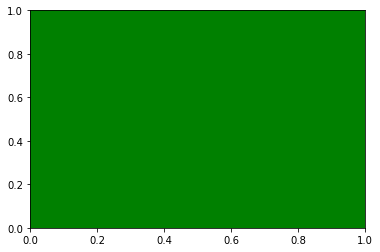

In [18]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
rect = ax.patch  # a Rectangle instance
rect.set_facecolor('green')
fig1.show()

当您调用绘图方法（例如，规范化 plot()并传入数组或值列表）时，该方法将创建一个matplotlib.lines.Line2D() 实例，使用Line2D作为关键字参数传递的所有属性更新该行，将该行添加到Axes.lines容器中，并将其返回到您

In [20]:

x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, '-', color='blue', linewidth=2)

In [21]:
#plot返回行列表，因为您可以传递多个x，y对来进行绘制，并且我们将长度为list的第一个元素解压缩到line变量中。该行已添加到 Axes.lines列表中：
print(ax.lines)

[<matplotlib.lines.Line2D object at 0x00000266A96E6198>, <matplotlib.lines.Line2D object at 0x00000266AA372278>]


<a list of 50 Patch objects>


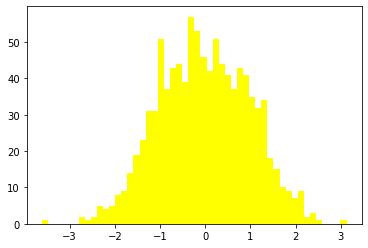

In [24]:
#同样，创建补丁的方法（例如 bar()创建矩形列表）会将补丁添加到Axes.patches列表中
fig2 = plt.figure()
ax = fig2.add_subplot(111)
n, bins, rectangles = ax.hist(np.random.randn(1000), 50, facecolor='yellow')
print(rectangles)
fig2.show()

In [26]:
'''
有很多很多Axes帮助程序方法可用于创建原始类型 Artists并将其添加到各自的容器中。下表总结了其中的一小部分样本，它们Artist创建的种类以及它们的存储位置

Helper method	Artist	Container
ax.annotate - text annotations	Annotate	ax.texts
ax.bar - bar charts	Rectangle	ax.patches
ax.errorbar - error bar plots	Line2D and Rectangle	ax.lines and ax.patches
ax.fill - shared area	Polygon	ax.patches
ax.hist - histograms	Rectangle	ax.patches
ax.imshow - image data	AxesImage	ax.images
ax.legend - axes legends	Legend	ax.legends
ax.plot - xy plots	Line2D	ax.lines
ax.scatter - scatter charts	PolygonCollection	ax.collections
ax.text - text	Text	ax.texts
'''
print('Some Artists')

Some Artists


In [28]:
'''
除了所有这些之外Artists，还Axes包含两个重要的Artist容器：XAxis 和和YAxis，用于处理刻度线和标签。它们存储为实例变量 xaxis和 yaxis。在XAxis和YAxis 容器进行详细说明，但要注意的是，Axes包含在转移呼叫许多辅助方法 Axis的实例，所以你往往不直接需要与他们合作，除非你想。例如，您可以XAxis使用Axeshelper方法设置ticklabel 的字体颜色：'''
for label in ax.get_xticklabels():
    label.set_color('orange')
#下面是Axes包含的Artists
'''
Axes attribute	Description
artists	A list of Artist instances
patch	Rectangle instance for Axes background
collections	A list of Collection instances
images	A list of AxesImage
legends	A list of Legend instances
lines	A list of Line2D instances
patches	A list of Patch instances
texts	A list of Text instances
xaxis	matplotlib.axis.XAxis instance
yaxis	matplotlib.axis.YAxis instance
'''
print('Axes包含的Artists')

Axes包含的Artists


轴容器

matplotlib.axis.Axis情况下处理该刻度线的图中，网格线，刻度标记标签和轴标签。您可以分别为y轴配置左侧和右侧的刻度，为x轴分别配置左侧和右侧的刻度。

The Axis also stores the data and view intervals used in auto-scaling, panning and zooming, as well as the Locator and Formatter instances which control where the ticks are placed and how they are represented as strings

每个Axis对象都包含一个label属性（这是pyplot对xlabel()和的调用中进行修改 的属性ylabel()）以及主要和次要刻度线的列表。刻度线是 XTick和YTick实例，其中包含呈现刻度线和ticklabel的实际行和文本基元。由于报价是根据需要动态创建的（例如，在平移和缩放时），因此您应该通过其访问器方法get_major_ticks() 和来访问主要和次要报价的列表get_minor_ticks()。尽管刻度线包含所有原始元素，并且将在下面进行介绍，但是Axis实例具有访问器方法，这些方法返回刻度线，刻度标签

tick是刻度线,应该用 由于这些都是动态的,所以需要使用get方法来获得.



[0.  0.2 0.4 0.6 0.8 1. ]


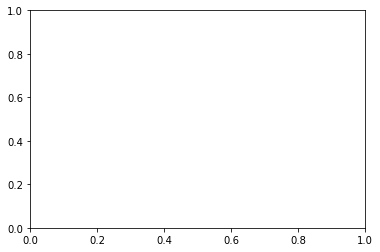

In [29]:
fig, ax = plt.subplots()
axis = ax.xaxis
print(axis.get_ticklocs())

In [30]:
print(axis.get_ticklabels())

<a list of 6 Text major ticklabel objects>


In [31]:
print(axis.get_ticklines())

<a list of 12 Line2D ticklines objects>


In [ ]:
'''下面是Axis的get方法

Accessor method	Description
get_scale	The scale of the axis, e.g., 'log' or 'linear'
get_view_interval	The interval instance of the axis view limits
get_data_interval	The interval instance of the axis data limits
get_gridlines	A list of grid lines for the Axis
get_label	The axis label - a Text instance
get_ticklabels	A list of Text instances - keyword minor=True|False
get_ticklines	A list of Line2D instances - keyword minor=True|False
get_ticklocs	A list of Tick locations - keyword minor=True|False
get_major_locator	The matplotlib.ticker.Locator instance for major ticks
get_major_formatter	The matplotlib.ticker.Formatter instance for major ticks
get_minor_locator	The matplotlib.ticker.Locator instance for minor ticks
get_minor_formatter	The matplotlib.ticker.Formatter instance for minor ticks
get_major_ticks	A list of Tick instances for major ticks
get_minor_ticks	A list of Tick instances for minor ticks
grid	Turn the grid on or off for the major or minor ticks

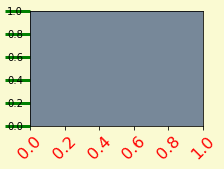

In [34]:
#下面是一个例子
# plt.figure creates a matplotlib.figure.Figure instance
fig = plt.figure()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()

In [37]:
'''
ticker

matplotlib.axis.Tick是从Figure->Axes->Axis->Tick
包含了tick 和grid line instance,lable对象,这些都是属性

tick1line	Line2D instance
tick2line	Line2D instance
gridline	Line2D instance
label1	Text instance
label2	Text instance
'''
#下面是个例子 
import matplotlib.ticker as ticker

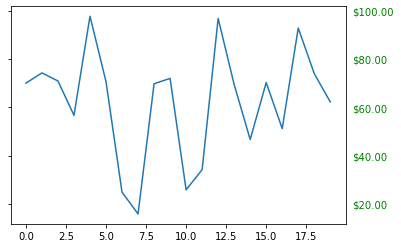

In [39]:
import matplotlib.ticker as ticker

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_visible(False)#左边的不可见
    tick.label2.set_visible(True)#设置右边的可见
    tick.label2.set_color('green')

plt.show()